In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import seaborn as sns
from collections import Counter
import re

In [2]:
data=pd.read_csv("C:\\Users\\jstyl\\Downloads\\Sample Dataset\\Soil.csv")

                    N         P         K  temperature  humidity        ph
N            1.000000 -0.000293 -0.073476     0.166515  0.007782 -0.059654
P           -0.000293  1.000000 -0.266888     0.009281  0.001986 -0.000410
K           -0.073476 -0.266888  1.000000    -0.087761 -0.002960  0.021796
temperature  0.166515  0.009281 -0.087761     1.000000 -0.006268 -0.011579
humidity     0.007782  0.001986 -0.002960    -0.006268  1.000000 -0.090463
ph          -0.059654 -0.000410  0.021796    -0.011579 -0.090463  1.000000


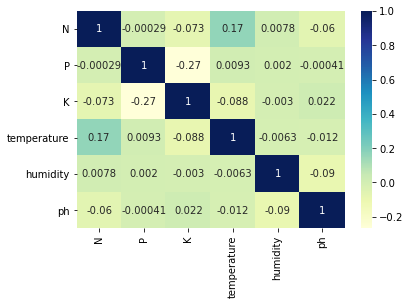

In [7]:
# prints data that will be plotted
print(data.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [4]:
data['date'] = pd.to_datetime(data.date)
data.set_index('date', inplace=True)
data.index = data.index.tz_localize('UTC').tz_convert('Africa/Nouakchott')
data.head()

N   P   K  temperature   humidity        ph
date                                                                    
2009-01-01 00:10:00+00:00  133  47  24    24.402289  79.197320  7.231325
2009-01-01 00:20:00+00:00  136  36  20    23.095956  84.862757  6.925412
2009-01-01 00:30:00+00:00  104  47  18    23.965635  76.976967  7.633437
2009-01-01 00:40:00+00:00  133  47  23    24.887381  75.621372  6.827355
2009-01-01 00:50:00+00:00  126  38  23    25.362438  83.632761  6.176716

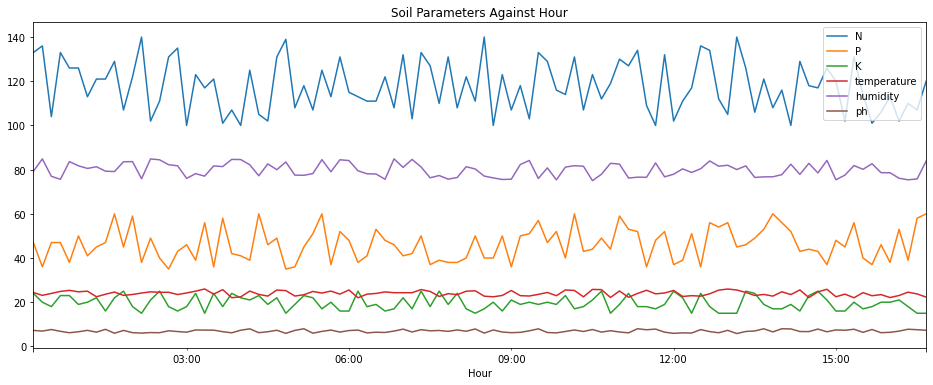

In [5]:
# Plot each feature vs time
fig, ax = plt.subplots(figsize=(16, 6))
for col in data.columns:
    data[col] = data[col].astype('float64')    
    data.plot(y=col, use_index=True, ax=ax)
    ax.set_title('Soil Parameters Against Hour')
    plt.xlabel('Hour')
plt.show()


In [6]:
# scaler = StandardScaler()
# scaler = RobustScaler()
scaler = MinMaxScaler()
data_norm = data.copy()
data_norm[:] = scaler.fit_transform(data_norm)

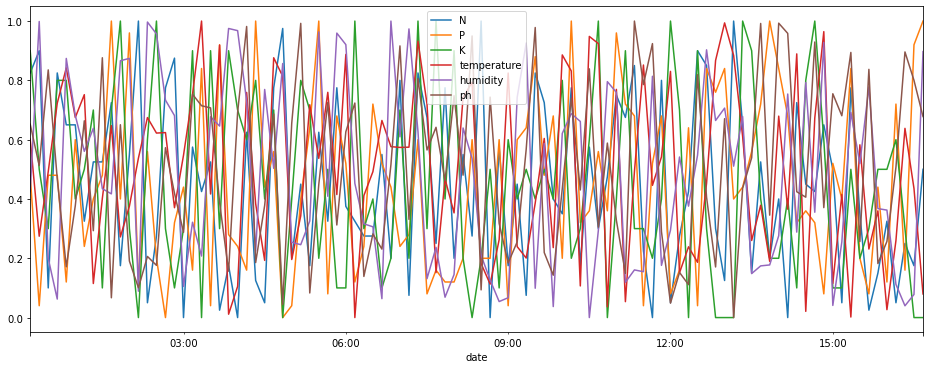

In [7]:
# Plot each feature (normalized) vs time
fig, ax = plt.subplots(figsize=(16, 6))
for col in data_norm.columns:
    data_norm[col] = data_norm[col].astype('float64')    
    data_norm.plot(y=col, use_index=True, ax=ax)
plt.show()

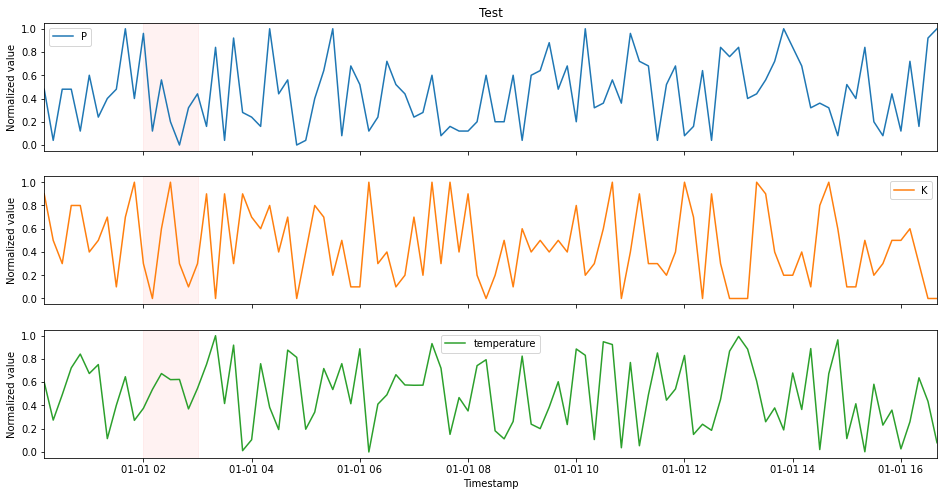

In [8]:
fig, axs = plt.subplots(3, 1, sharex=True, figsize=(16, 8))
cols = [1, 2, 3]
colors = ['tab:blue', 'tab:orange', 'tab:green']
for i in range(3):
    ax = axs[i]
    col = data_norm.columns[cols[i]]
    ax.plot(data_norm.index, data_norm[col], color=colors[i], label=col)
    ax.set_ylabel('Normalized value')
    ax.set_xlim([data_norm.index[0], data_norm.index[-1]])
    ax.legend()
    ax.axvspan('2009-01-01 02:00:00-00:00', '2009-01-01 03:00:00-00:00', alpha=0.05, color='red')
    
axs[0].set_title('Test')
plt.xlabel('Timestamp')
plt.show()

In [3]:
import pickle

In [9]:
with open('soil.pkl', 'wb') as f:
    pickle.dump((data, data_norm), f)